# Step
- Data exploration
- EDA (Exploratory data analysis)
- Feature Engineering
- Transformation
- Splitting the data into train test sets
- Build our NN model
- Predict the test data and find accuracy
- Predict the feature data
- Create the web app for model using streamlit

In [54]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [55]:
import yfinance as yf
# BTC - USD
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [56]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
stock = "BTC-USD"
bit_coin_data = yf.download(stock, start, end)
bit_coin_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [57]:
bit_coin_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3632.000000,3632.000000,3632.000000,3632.000000,3632.000000,3.632000e+03
mean,17561.391906,17962.030054,17134.724874,17577.723695,17577.723695,1.753927e+10
std,19422.309663,19859.960880,18944.805820,19433.577565,19433.577565,1.919636e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1124.520050,1165.457489,1102.349976,1131.132507,1131.132507,2.789338e+08
50%,9079.531250,9264.639648,8832.564453,9084.533203,9084.533203,1.373367e+10
75%,28864.016113,29348.497559,28304.532227,28861.938965,28861.938965,2.835151e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


In [58]:
bit_coin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3632 entries, 2014-09-17 to 2024-08-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3632 non-null   float64
 1   High       3632 non-null   float64
 2   Low        3632 non-null   float64
 3   Close      3632 non-null   float64
 4   Adj Close  3632 non-null   float64
 5   Volume     3632 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 198.6 KB


In [59]:
bit_coin_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [60]:
Closing_price = bit_coin_data[["Close"]]
Closing_price

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2024-08-22,60381.914062
2024-08-23,64094.355469
2024-08-24,64178.992188


In [61]:
import seaborn as sns
%matplotlib inline
sns.set_theme()

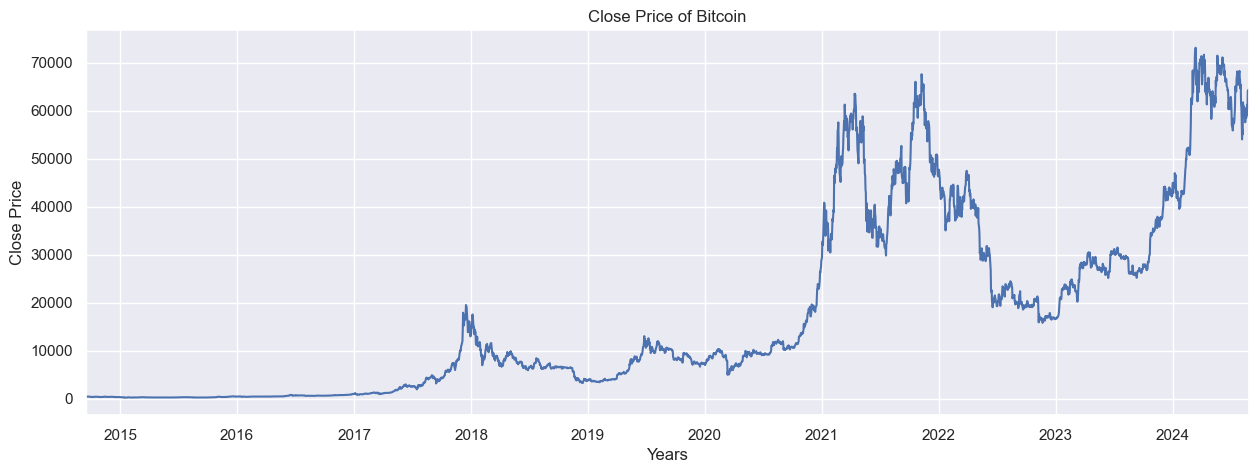

In [62]:
plt.figure(figsize = (15,5))
Closing_price["Close"].plot()
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.title("Close Price of Bitcoin");

In [63]:
# Check number days of each year
for i in range(2014, 2025):
    print(f"The number days of {i} {list(Closing_price.index.year).count(i)} days")

The number days of 2014 106 days
The number days of 2015 365 days
The number days of 2016 366 days
The number days of 2017 365 days
The number days of 2018 365 days
The number days of 2019 365 days
The number days of 2020 366 days
The number days of 2021 365 days
The number days of 2022 365 days
The number days of 2023 365 days
The number days of 2024 239 days


In [64]:
Closing_price["MA_for_365_days"] = Closing_price.rolling(365).mean()
Closing_price["MA_for_365_days"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_18172\4246168655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price["MA_for_365_days"] = Closing_price.rolling(365).mean()


Date
2014-09-17             NaN
2014-09-18             NaN
2014-09-19             NaN
2014-09-20             NaN
2014-09-21             NaN
                  ...     
2024-08-22    50534.799765
2024-08-23    50638.723004
2024-08-24    50743.192385
2024-08-25    50848.192605
2024-08-26    50951.877659
Name: MA_for_365_days, Length: 3632, dtype: float64

In [65]:
Closing_price["MA_for_365_days"].to_frame().iloc[0:365]

,MA_for_365_days
Date,
2014-09-17,NaN
2014-09-18,NaN
2014-09-19,NaN
2014-09-20,NaN
2014-09-21,NaN
...,...
2015-09-12,NaN
2015-09-13,NaN
2015-09-14,NaN


<Figure size 640x480 with 0 Axes>

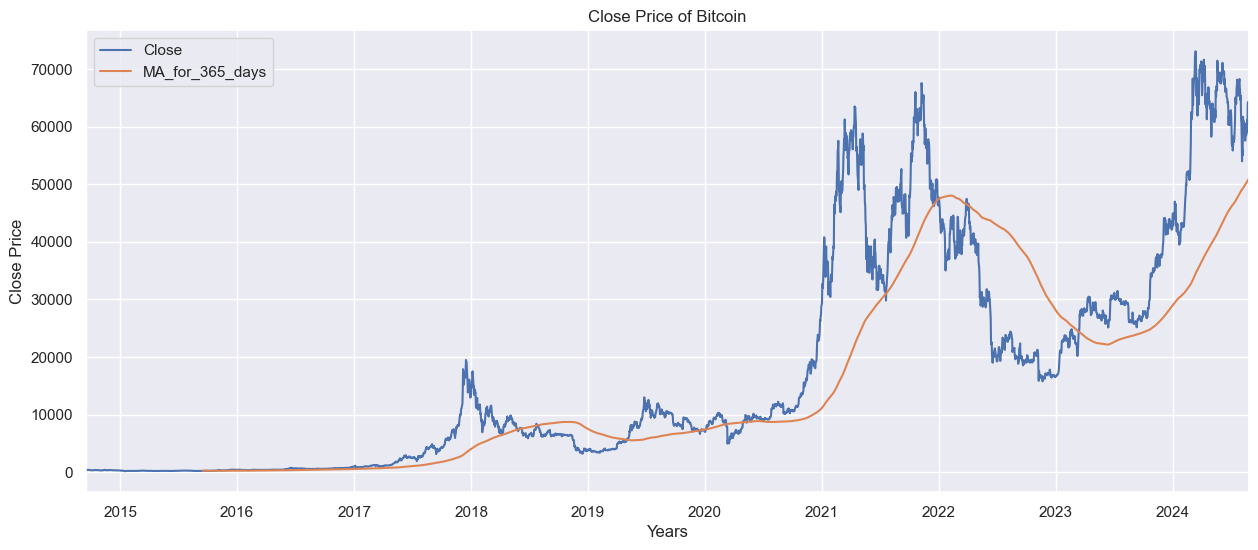

In [66]:
plt.figure()
Closing_price[["Close", "MA_for_365_days"]].plot(figsize = (15,6))
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.title("Close Price of Bitcoin");

MA for 100 days

In [67]:
Closing_price["MA_for_100_days"] = Closing_price["Close"].rolling(100).mean()
Closing_price["MA_for_100_days"].head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18172\4229345755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price["MA_for_100_days"] = Closing_price["Close"].rolling(100).mean()


Date
2014-09-17   NaN
2014-09-18   NaN
2014-09-19   NaN
2014-09-20   NaN
2014-09-21   NaN
Name: MA_for_100_days, dtype: float64

<Figure size 640x480 with 0 Axes>

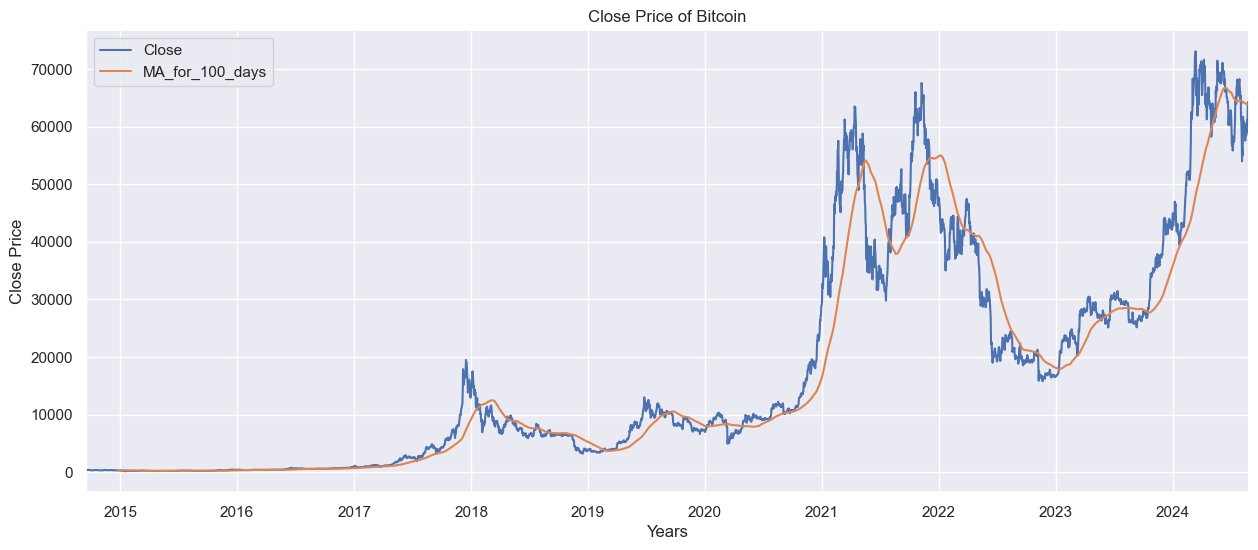

In [68]:
plt.figure()
Closing_price[["Close", "MA_for_100_days"]].plot(figsize = (15,6))
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.title("Close Price of Bitcoin");

In [69]:
# 1 to 100 ==> 101 day
# 2 to 101 (100 days) ==> 102 day
# 3 to 102 (100 days) ==> 103rd day feature days close price using our model

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(Closing_price[["Close"]].values)
scaled_data

array([[0.00383005],
       [0.00337886],
       [0.00297225],
       ...,
       [0.87786216],
       [0.87998204],
       [0.87451187]])

In [71]:
scaled_data.shape

(3632, 1)

In [72]:
x_data = []
y_data = []

base_days = 100
for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [73]:
x_data[0], y_data[0]

(array([[0.00383005],
        [0.00337886],
        [0.00297225],
        [0.00316576],
        [0.00302746],
        [0.00307315],
        [0.00353455],
        [0.00336192],
        [0.00320238],
        [0.00310432],
        [0.00303705],
        [0.00273063],
        [0.00270712],
        [0.00286455],
        [0.00281889],
        [0.00270171],
        [0.00248828],
        [0.00206793],
        [0.00195331],
        [0.00208456],
        [0.00216834],
        [0.00239814],
        [0.00256391],
        [0.0025164 ],
        [0.00252651],
        [0.0027494 ],
        [0.00291214],
        [0.00305556],
        [0.00297193],
        [0.00280436],
        [0.00282085],
        [0.00292624],
        [0.00290024],
        [0.00280832],
        [0.00285812],
        [0.00281262],
        [0.00247326],
        [0.00247227],
        [0.00232038],
        [0.00242233],
        [0.00239881],
        [0.0024623 ],
        [0.00216017],
        [0.00229341],
        [0.00219762],
        [0

In [74]:
len_train = int(len(x_data) * 0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

In [75]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3178, 100, 1)
(3178, 1)
(354, 100, 1)
(354, 1)


In [76]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))

model.add(LSTM(64, return_sequences = False))

model.add(Dense(25))

model.add(Dense(1))

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [79]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
636/636 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - loss: 0.0034
Epoch 2/10
636/636 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - loss: 5.6867e-04
Epoch 3/10
636/636 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - loss: 3.0245e-04
Epoch 4/10
636/636 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - loss: 3.0885e-04
Epoch 5/10
636/636 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - loss: 3.1789e-04
Epoch 6/10
636/636 ━━━━━━━━━━━━━━━━━━━━ 51s 80ms/step - loss: 2.2661e-04
Epoch 7/10
636/636 ━━━━━━━━━━━━━━━━━━━━ 37s 58ms/step - loss: 2.8989e-04
Epoch 8/10
636/636 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - loss: 2.3387e-04
Epoch 9/10
636/636 ━━━━━━━━━━━━━━━━━━━━ 47s 73ms/step - loss: 1.9213e-04
Epoch 10/10
636/636 ━━━━━━━━━━━━━━━━━━━━ 45s 70ms/step - loss: 2.4764e-04


In [80]:
predictions = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


In [81]:
predictions

array([[0.35972846],
       [0.35636833],
       [0.35595953],
       [0.35510755],
       [0.34689042],
       [0.35397705],
       [0.35948545],
       [0.36401215],
       [0.36548248],
       [0.3652441 ],
       [0.36482129],
       [0.36742982],
       [0.3732687 ],
       [0.37294677],
       [0.36608648],
       [0.3654721 ],
       [0.3652716 ],
       [0.36127853],
       [0.36133203],
       [0.36030483],
       [0.36185578],
       [0.37021512],
       [0.36986783],
       [0.37068784],
       [0.38329417],
       [0.37905777],
       [0.37757564],
       [0.3819025 ],
       [0.37755477],
       [0.38367435],
       [0.38448924],
       [0.38423675],
       [0.37990487],
       [0.377095  ],
       [0.37038094],
       [0.36819053],
       [0.36914223],
       [0.3692184 ],
       [0.37293115],
       [0.39014828],
       [0.3907524 ],
       [0.3900645 ],
       [0.3949119 ],
       [0.40734845],
       [0.41145542],
       [0.41293043],
       [0.4524109 ],
       [0.465

In [82]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[26404.248],
       [26159.277],
       [26129.475],
       [26067.36 ],
       [25468.287],
       [25984.94 ],
       [26386.531],
       [26716.553],
       [26823.748],
       [26806.367],
       [26775.543],
       [26965.719],
       [27391.404],
       [27367.936],
       [26867.783],
       [26822.992],
       [26808.373],
       [26517.258],
       [26521.158],
       [26446.27 ],
       [26559.342],
       [27168.783],
       [27143.463],
       [27203.246],
       [28122.316],
       [27813.459],
       [27705.404],
       [28020.855],
       [27703.883],
       [28150.033],
       [28209.443],
       [28191.035],
       [27875.217],
       [27670.363],
       [27180.871],
       [27021.18 ],
       [27090.564],
       [27096.117],
       [27366.797],
       [28622.018],
       [28666.062],
       [28615.91 ],
       [28969.31 ],
       [29876.004],
       [30175.424],
       [30282.959],
       [33161.3  ],
       [34135.38 ],
       [34812.547],
       [34539.47 ],


In [83]:
inv_y_test = scaler.inverse_transform(y_test)

In [84]:
inv_predictions[:5], inv_y_test[:5]

(array([[26404.248],
        [26159.277],
        [26129.475],
        [26067.36 ],
        [25468.287]], dtype=float32),
 array([[25905.65429687],
        [25895.67773438],
        [25832.2265625 ],
        [25162.65429688],
        [25833.34375   ]]))

In [88]:
plotting_data = pd.DataFrame({
    "Original_test_data": inv_y_test.reshape(-1),
    "Predictions": inv_predictions.reshape(-1)
})
index = Closing_price.index[len_train + 100:]
plotting_data

,Original_test_data,Predictions
0,25905.654297,26404.248047
1,25895.677734,26159.277344
2,25832.226562,26129.474609
3,25162.654297,26067.359375
4,25833.343750,25468.287109
...,...,...
349,60381.914062,62047.957031
350,64094.355469,60748.191406
351,64178.992188,65224.550781
352,64333.542969,64551.683594


<Figure size 640x480 with 0 Axes>

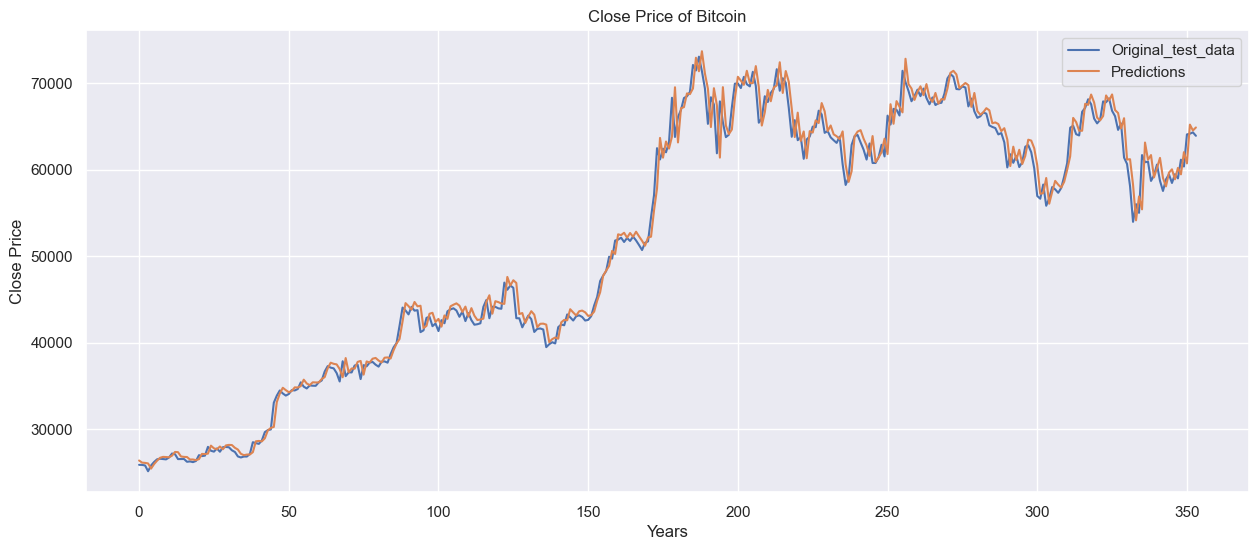

In [89]:
plt.figure()
plotting_data[["Original_test_data", "Predictions"]].plot(figsize = (15,6))
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.title("Close Price of Bitcoin");

# Predict future

In [181]:
last_100 = Closing_price[["Close"]].tail(100)

In [182]:
last_100.tail()

,Close
Date,
2024-08-22,60381.914062
2024-08-23,64094.355469
2024-08-24,64178.992188
2024-08-25,64333.542969
2024-08-26,63934.738281


In [183]:
last_100 = scaler.fit_transform(last_100["Close"].values.reshape(-1, 1)).reshape(1, -1, 1)

In [184]:
last_100

array([[[0.70384914],
        [1.        ],
        [0.92486202],
        [0.86676438],
        [0.79843698],
        [0.83260941],
        [0.87499097],
        [0.83215069],
        [0.88235829],
        [0.81944069],
        [0.77830328],
        [0.82338034],
        [0.77333788],
        [0.78568403],
        [0.78824259],
        [0.84857343],
        [0.94956505],
        [0.97906969],
        [0.96041464],
        [0.87938128],
        [0.8772725 ],
        [0.89687632],
        [0.88910219],
        [0.76420772],
        [0.81628826],
        [0.7312329 ],
        [0.68853852],
        [0.69884435],
        [0.72451048],
        [0.71598942],
        [0.63868111],
        [0.62834418],
        [0.62080321],
        [0.5788448 ],
        [0.58780288],
        [0.52640646],
        [0.36008772],
        [0.44757408],
        [0.39066979],
        [0.43612636],
        [0.36253506],
        [0.39502923],
        [0.49762079],
        [0.50757039],
        [0.46042728],
        [0

In [161]:
last_100.shape

(1, 100, 1)

In [162]:
day101 = model.predict(last_100)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


array([[0.5765512]], dtype=float32)

In [187]:
scaler.inverse_transform(day101)

array([[64056.16]], dtype=float32)

In [ ]:
# day 101 = 100 day previous = day 1 + ... + day 100 = past 100
# day 102 = day 2 + .... + day 101 = day 101 + past 99
# day 103 = day 3 + ... day 102 = day 101 + day 102 + past 98

In [185]:
last_100.shape

(1, 100, 1)

In [197]:
def predict_future(no_of_days, prev_100):
    future_predictions = []
    for i in range(no_of_days):
        # Dự đoán ngày tiếp theo từ mô hình
        next_day = model.predict(prev_100)  # Không chuyển đổi thành danh sách

        # Cập nhật prev_100: Loại bỏ phần tử đầu tiên và thêm next_day vào cuối
        prev_100 = np.concatenate([prev_100[:, 1:, :], next_day.reshape(1, 1, -1)], axis=1)
        
        # Thêm dự đoán vào danh sách future_predictions
        future_predictions.append(scaler.inverse_transform(next_day))
    
    return future_predictions

In [205]:
no_of_days = 10
future_result = predict_future(no_of_days, last_100)
print(future_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[array([[64056.16]], dtype=float32), array([[64176.15]], dtype=float32), array([[64269.996]], dtype=float32), array([[64348.99]], dtype=float32), array([[64420.617]], dtype=float32), array([[64490.85]], dtype=float32), array([[64564.01]], dtype=float32), array([[64642.855]], dtype=float32), array([[64728.914]], dtype=float32), array([[64822.766]], dtype=float32)]


In [206]:
future_result = np.array(future_result).reshape(-1, 1)

In [207]:
future_result

array([[64056.16 ],
       [64176.15 ],
       [64269.996],
       [64348.99 ],
       [64420.617],
       [64490.85 ],
       [64564.01 ],
       [64642.855],
       [64728.914],
       [64822.766]], dtype=float32)

Text(0.5, 1.0, 'Feture Close Price of Bit Coin')

<Figure size 640x480 with 0 Axes>

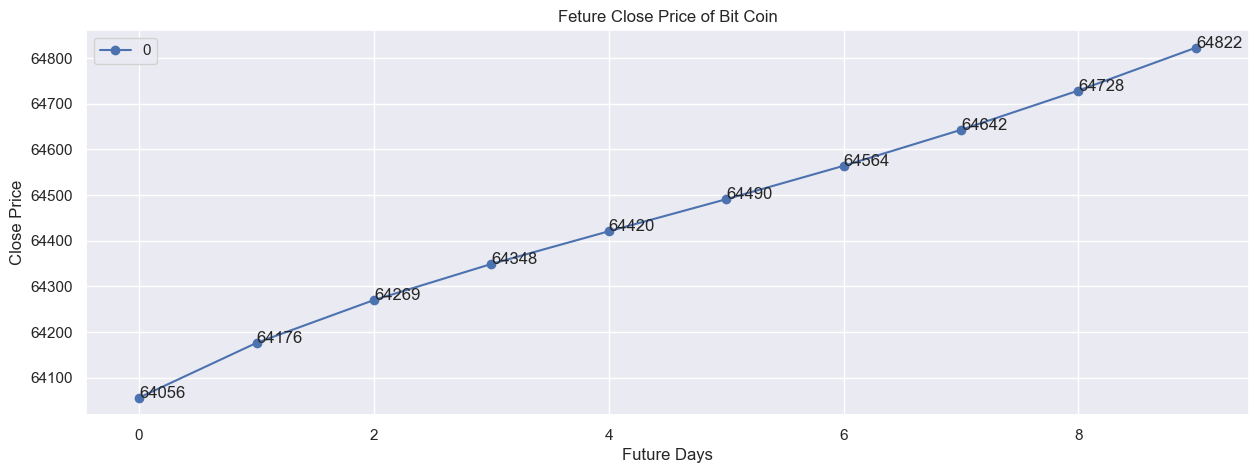

In [209]:
plt.figure()
pd.DataFrame(future_result).plot(figsize = (15,5), marker = "o")
for i in range(len(future_result)):
    plt.text(i, future_result[i], int(future_result[i][0]))
plt.xlabel("Future Days")
plt.ylabel("Close Price")
plt.title("Feture Close Price of Bit Coin")

In [204]:
model.save("Latest_Bitcoin_Model.keras")